In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
base_credit = pd.read_csv('./credit_risk_dataset.csv')
base_credit

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


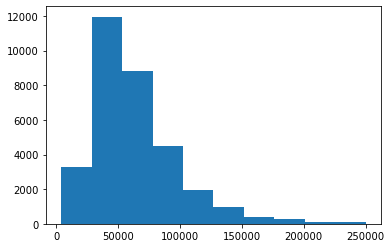

In [2]:
# Limpar base dos outliers
base = base_credit[base_credit['person_income'] <= 250000]
plt.hist(x = base['person_income']);

In [47]:
base

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


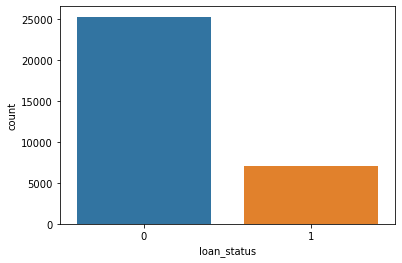

In [48]:
#0 = Paga, 1 = Não paga. Temos muito mais pagantes
sns.countplot(x = base['loan_status']);

In [49]:
base.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              892
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3096
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [52]:
# Limpar dados nulos ou números inválidos
base.loc[pd.isnull(base['loan_int_rate']), 'loan_int_rate'] = base['loan_int_rate'].mean()
base.loc[pd.isnull(base['person_emp_length']), 'person_emp_length'] = base['person_emp_length'].mean()

In [53]:
# Previsores
X_credit = base_credit.iloc[:, [0,1,6]] #age, income, loan_amnt
Y_credit = base_credit.iloc[:, 8] # classe 0 ou 1
np_x_credit = X_credit.values
np_y_credit = Y_credit.values

In [54]:
from sklearn.preprocessing import StandardScaler
creditStandardScaler = StandardScaler()

# escalar valores para "income" não ser considerado mais importante que "age" por conta do tamanho do número
np_x_credit_fit = creditStandardScaler.fit_transform(np_x_credit)

In [55]:
# separar base de treinamento e de teste
from sklearn.model_selection import train_test_split
npx_train, npx_test, npy_train, npy_test = train_test_split(np_x_credit_fit, np_y_credit, test_size = 0.1, random_state = 0)

In [56]:
# treinamento algoritimo com base TRAIN
from sklearn.naive_bayes import GaussianNB
naive_credit = GaussianNB()
naive_credit.fit(npx_train, npy_train) 

GaussianNB()

In [57]:
# previsão com base de TEST
predict = naive_credit.predict(npx_test)
predict, npy_test

(array([0, 1, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]))

In [59]:
# Validação da eficiência
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(npy_test, predict)

0.7934949370972691

In [60]:
confusion_matrix(npy_test, predict)

array([[2520,   57],
       [ 616,   66]])